<h1 style="font-family:arial;background-color:mediumpurple;font-size:400%;"> <font color='ivory'><b><center><u> Fraud Detection In Credit Card Transactions</u></center> </b></font></h1>

In [15]:
#pip install IPython #package to display images

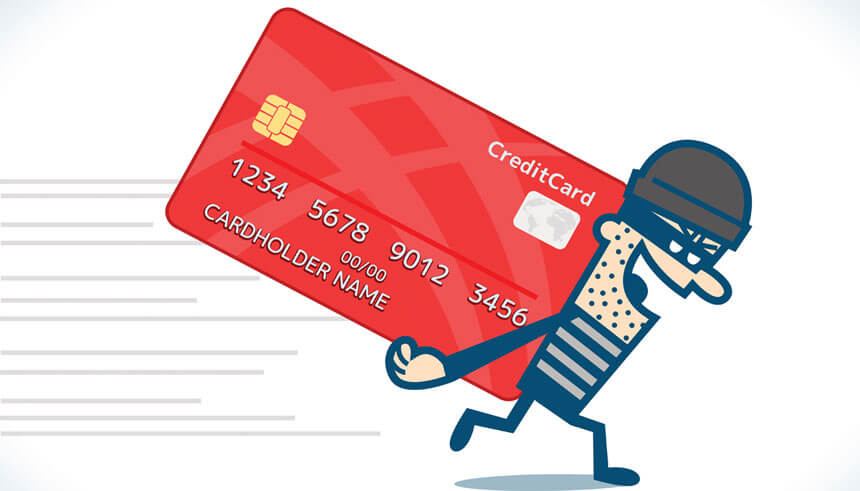

In [16]:
from IPython.display  import Image
Image(filename='Credit-card-fraud-top.jpg',width=1000,height=100)

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## <font color='crimson'>Importing necessary libraries and modules:</font> 

In [18]:

%matplotlib inline
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from sklearn.decomposition import PCA
print('Using TensorFlow version', tf.__version__)


from tensorflow.keras import layers 

from pylab import rcParams
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense ,Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
from imblearn.over_sampling import ADASYN
from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics

from sklearn.metrics import plot_confusion_matrix
import re
from matplotlib import rcParams

Using TensorFlow version 2.2.0


## <font color='crimson'>Loading dataset:</font> 

In [19]:
credit_data=pd.read_csv("C:/Users/krish/OneDrive/Documents/UoH/datasets tableau project/creditcard.csv")

###### Source of data: https://www.kaggle.com/mlg-ulb/notebook .
Desc: The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

#### <font color='hotpink'>Checking dimensions of dataset</font> 

In [20]:
credit_data.shape

(284807, 31)

The dataset has 31 columns with 2,84,807 rows.

#### <font color='hotpink'>Checking sample data</font>

In [21]:
credit_data.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


The field names are encrypted due to confidentiality reasons in the source end.

## <font color='crimson'>Checking for Missing data:</font> 

In [22]:
if (np.any(credit_data.isnull())==False):
    print('*************No Nulls in Credit dataframe***************')

*************No Nulls in Credit dataframe***************


##### Since no nulls, no need to impute.

In [23]:
c=0
for i in credit_data.columns:
    #print(type(i))
    if (i.isspace()==True):
        print(i)
        c+=1
if (c==0):
    print('********No spaces in Credit Data dataframe*********')

********No spaces in Credit Data dataframe*********


#### Since no spaces in the data, no need to handle.

In [24]:
regex = re.compile('[@_!#$%^&*()<>?/\|}{~:]')
c=0
for i in credit_data.columns:
    #print(i)
    if(regex.search(i) == None): 
        #print(regex.search(i))
        c+=1
if (c==31):
    print('************** No junk values in Credit Data dataframe *****************')

************** No junk values in Credit Data dataframe *****************


##### Since no junk in data, no need to handle

In [25]:
c=0
for i in credit_data.columns.values:
    #print(i,' --- ',credit_data[i].dtypes)
    if (credit_data[i].dtypes=='str'):
        c+=1
        print(i)
if (c==0):
    print('************No String data in given dataset****************')


************No String data in given dataset****************


##### Since no categorical data, no need for encoding.

#### <font color='hotpink'>Identifying classes in target variable</font> 

In [26]:
class_count=credit_data["Class"].value_counts(sort=True)
print(class_count)
type(class_count)

0    284315
1       492
Name: Class, dtype: int64


pandas.core.series.Series

In total, there are only 492 fraudulent transactions which accounts to around 0.17% of total transactions

#### <font color='hotpink'>Visualizing class count</font>
Here, we are trying to understand the distribution of target variable visually

Text(0.5, 1.0, 'Visualizing the target variable-class')

Text(0.5, 0, 'Classes- 0=Not Fraud;1=Fraud')

Text(0, 0.5, 'Number of transactions')

Text(0, 100000, '284315')

Text(1, 15000, '492')

([<matplotlib.axis.XTick at 0x27eb8fba648>,
 <a list of 2 Text xticklabel objects>)

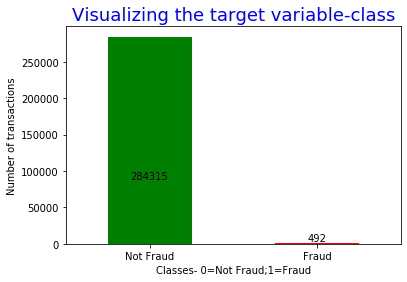

In [27]:

mycolor=list('gr')
viz=class_count.plot(kind="bar",rot=0,color=mycolor)

plt.title("Visualizing the target variable-class",color='blue',fontsize=18)
plt.xlabel("Classes- 0=Not Fraud;1=Fraud")
plt.ylabel("Number of transactions")
plt.annotate(class_count[0],xy=(0,100000),verticalalignment="top",horizontalalignment="center")
plt.annotate(class_count[1],xy=(1,15000),verticalalignment="top",horizontalalignment="center")

LABELS=["Not Fraud","Fraud"]
plt.xticks(range(2),LABELS)




In [28]:
frauds=credit_data[credit_data.Class==1]
nonfrauds=credit_data[credit_data.Class==0]

In [29]:
frauds.shape

(492, 31)

In [30]:
nonfrauds.shape

(284315, 31)

In [31]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

From the above summary statistics of fraud data in target field, its been observed that the average fraud amount involved is 122.2 dollars with maximum value being 2125.8 dollars.

In [32]:
nonfrauds.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

From the above summary statistics of non-fraud data in target field, its been observed that the average normal amount involved is 88.2 dollars with maximum value being 25691.1 dollars.

### <font color='blue'>Correlation Matrix:</font>
Let us see how the features are correlated, to check if the dataset is good enough to proceed with ML modeling.

In [33]:
corrMatrix = round(credit_data.corr(),1)
corrMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.0,0.1,-0.0,-0.4,-0.1,0.2,-0.1,0.1,-0.0,-0.0,...,0.0,0.1,0.1,-0.0,-0.2,-0.0,-0.0,-0.0,-0.0,-0.0
V1,0.1,1.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.2,-0.1
V2,-0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.5,0.1
V3,-0.4,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.2,-0.2
V4,-0.1,0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.1,0.1
V5,0.2,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.4,-0.1
V6,-0.1,0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.2,-0.0
V7,0.1,0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,...,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.4,-0.2
V8,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.1,0.0
V9,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.1


<Figure size 1080x1080 with 0 Axes>

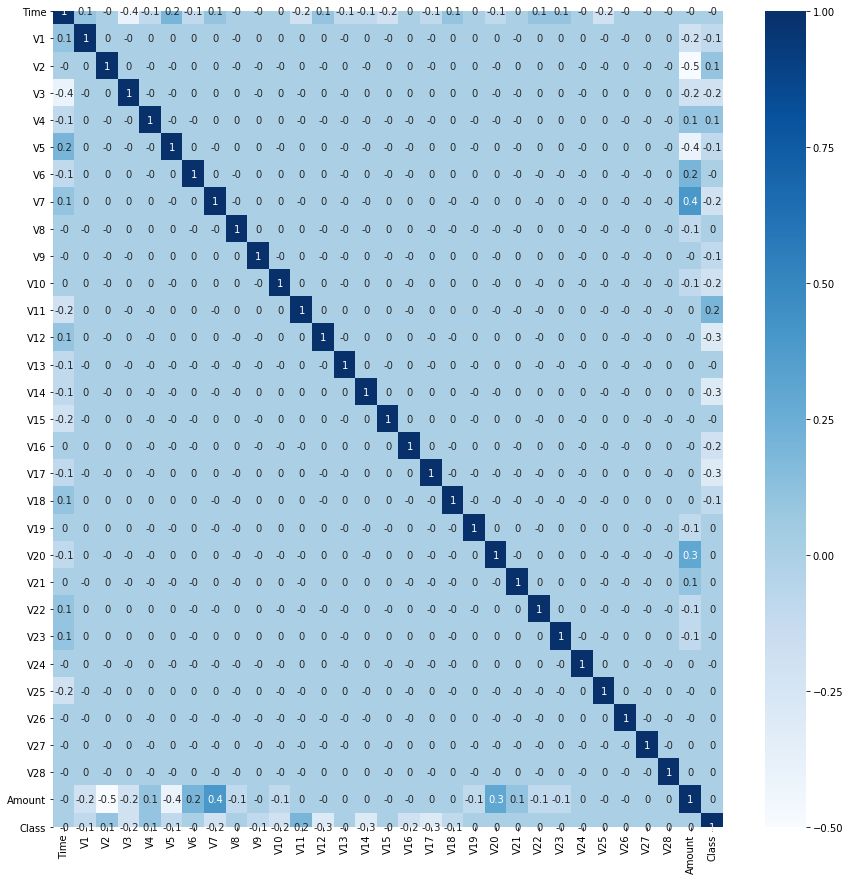

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True,cmap="Blues")
plt.show()

##### There isn't any high correlation between the fields, which makes dataset good enough to model

## <font color='crimson'>Exploratory data analysis through visualization</font>

### <font color='blue'>Amount vs Number of transaction in each class</font> 

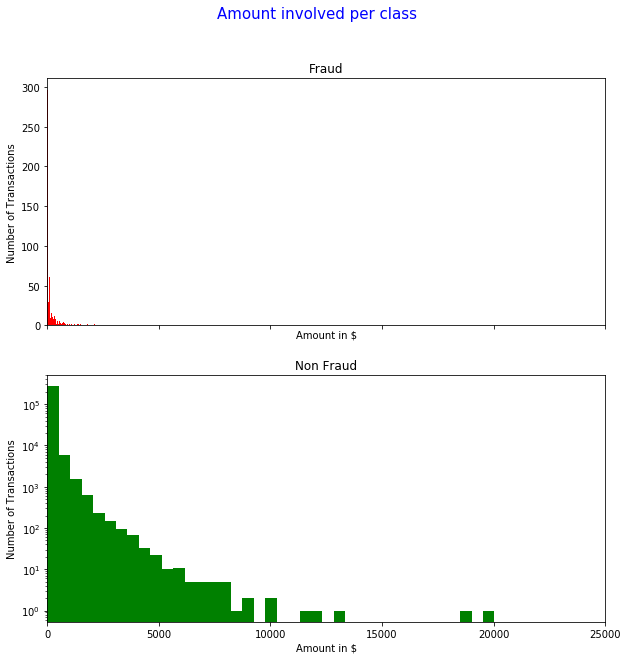

In [35]:
f,(fig1,fig2)=plt.subplots(2,1,sharex=True,figsize=(10,10))
f.suptitle('Amount involved per class',fontsize=15,color='blue')
bins=50
fig1.hist(frauds.Amount,bins=bins,color='r')
fig1.set_title('Fraud')
fig2.hist(nonfrauds.Amount,bins=bins,color='g')
fig2.set_title('Non Fraud')
fig1.set(xlabel='Amount in $',ylabel='Number of Transactions')
fig2.set(xlabel='Amount in $',ylabel='Number of Transactions')
plt.xlim(0,25000)
plt.yscale('log')
plt.show();

### <font color='blue'> Amount vs Time </font>

<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Amount involved with Time')

Text(0.5, 0, 'Time in secs')

Text(0, 0.5, 'Amount involved $')

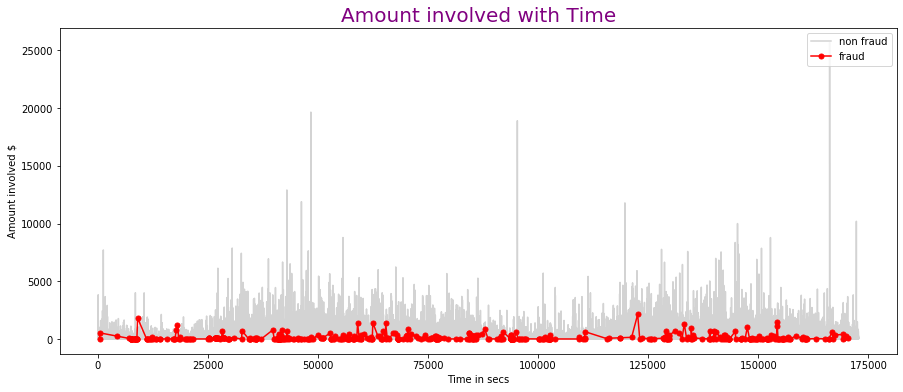

In [36]:
plt.figure(figsize=(15,6))

plt.plot(nonfrauds.Time,nonfrauds.Amount,color='lightgrey')
plt.plot(frauds.Time,frauds.Amount,marker='o',color='r',markersize=5)
plt.title('Amount involved with Time',color='purple',fontsize=20)
plt.xlabel('Time in secs')
plt.ylabel('Amount involved $')
plt.legend(['non fraud', 'fraud'], loc='upper right')
plt.show()


#### <font color='olive'>Notes: From plot it appears that time of transaction doesn't seem to have much effect in arriving at some conclusion since we can see both fraudulent and non-fraudulent spread around the whole period of observation, hence dropping time column.</font>

In [37]:
credit_data_new=credit_data.drop(['Time'],axis=1)

### <font color='blue'>Splitting data:</font>
The basic concept of ML model is we build a model with existing data and validate the model with unseen data. To achieve this,, we need to split the data in to two sets, train set: major portion of total dataset, the one used to train the ML model; test set: it is a small part of actual total dataset, the one used to test the performance of the trained model as it is unseen by the model.

Here, we are splitting the train and test data in 80:20 ratio. A random state is set to enable reproceability of the results. Since the data is highly imbalanced, a stratified approach of split is considered which helps to create sets that contains approximately the same percentage of samples of each target class as the complete set.

In [38]:
X = credit_data_new.iloc[:, :-1]
y = credit_data_new['Class']
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)
print('train dataset shape {}'.format(Counter(y_train)))
print('test dataset shape {}'.format(Counter(y_test)))

train dataset shape Counter({0: 227451, 1: 394})
test dataset shape Counter({0: 56864, 1: 98})


In [39]:

X_train[0:5]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


In [40]:
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
# summarize
#train_0, train_1 = len(trainy[trainy==0]), len(trainy[trainy==1])
#test_0, test_1 = len(testy[testy==0]), len(testy[testy==1])
#print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

### <font color='blue'>Feature scaling:</font>
since there are few features that are in scale greater than that of others, we scale the fields to avoid the fields of higher values effecting the performance of model.

In [41]:
sc=StandardScaler().fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [42]:
print('X_train is:',X_train.shape)
print('X_test is:',X_test.shape)
print('y_train is:',y_train.shape)
print('y_test is:',y_test.shape)


X_train is: (227845, 29)
X_test is: (56962, 29)
y_train is: (227845,)
y_test is: (56962,)


In [43]:
type(X_train)

numpy.ndarray

In [44]:
X_train[0:2,:]


array([[ 9.93379083e-01, -4.56036586e-01, -8.94051557e-01,
        -4.67283725e-01,  1.08921729e+00,  3.02438347e+00,
        -1.19485202e+00,  9.57057418e-01,  1.28137638e+00,
        -1.44546401e-01, -1.10814578e-01,  5.09338566e-01,
         6.21173504e-02, -6.95576832e-02,  1.45109663e+00,
         4.04446404e-01, -9.07403516e-01,  1.69133453e-01,
        -5.55365736e-01, -1.73112388e-01,  1.03171150e-01,
         4.09563109e-01,  4.90684977e-01,  1.14196982e+00,
        -6.70831980e-01, -8.07226946e-01,  1.91911522e-01,
        -9.91057622e-02, -3.22493763e-01],
       [ 1.03850725e+00, -2.93491180e-02, -2.01830171e+00,
         1.75133177e-01,  2.13350569e+00,  2.47884001e+00,
        -1.83232506e-03,  5.66703699e-01,  4.11208797e-02,
         2.62604208e-01, -2.49329490e-01,  3.23973351e-01,
        -4.07235825e-01,  7.54324041e-01, -1.63023227e-01,
        -8.61271777e-01, -3.21276918e-01, -8.29392525e-01,
        -3.37959105e-01, -2.93563756e-01,  5.20550968e-02,
         3.14

In [45]:
np.unique(y_train)
np.unique(y_test)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

### <font color='blue'>Dimensionality Reduction:</font>
Since there are many input features involved, let us check if we can reduce the dimensions involved based on the amount of variability explained by each variable and lets see if fewer input fields can be used to build the model to predict target variable instead of all the input dimensions.

In [46]:
pca = PCA()
pca.fit(X_train)
print(pca.explained_variance_ratio_)
#X_train_pca=pca.transform(X_train)
#X_test_pca=pca.transform(X_test)


PCA()

[0.06744254 0.03568921 0.03491253 0.03484507 0.03477761 0.03476289
 0.03472299 0.03467959 0.03467382 0.0346087  0.03459226 0.03456541
 0.03454699 0.03453002 0.03450765 0.03447158 0.03445218 0.03442315
 0.03439892 0.03435332 0.03434393 0.03433334 0.03432126 0.03424086
 0.03415626 0.0341541  0.03359717 0.03340814 0.00148852]


#### From the result , it is observed that combination of fewer columns can not give higher target variance explanation.Hence not considering PCA for dimensionality reduction

### <font color='blue'>Handling Imbalanced data:</font> 

Here, adaptive synthetic sampling (ADASYN) technique is used which generates synthetic
samples inversely proportional to the density of minority class i.e., more synthetic data
is generated for minority class samples that are harder to learn compared to those
minority samples that are easier to learn. It helps to maintain the proportion of majority
and minority class in train and test data after split. It is a modified and improved version
of SMOTE (Synthetic minority oversampling technique) which is widely used to
handle imbalanced datasets.

In [47]:
# apply the ADASYN over-sampling to handle imbalanced dataset
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y)))
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284240})


In [48]:
X1, y1 = X_res, y_res 

In [49]:
X1.shape
y1.shape

(568555, 29)

(568555,)

In [50]:
X_train1,X_test1,y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2, random_state=42)
X_train1.shape
X_test1.shape
y_train1.shape
y_test1.shape
print('train dataset shape {}'.format(Counter(y_train1)))
print('test dataset shape {}'.format(Counter(y_test1)))

(454844, 29)

(113711, 29)

(454844,)

(113711,)

train dataset shape Counter({0: 227562, 1: 227282})
test dataset shape Counter({1: 56958, 0: 56753})


In [51]:
X_train1[0:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
44555,-0.612156,0.921782,1.948896,1.037304,0.107061,0.054649,0.383061,0.266002,-0.909192,-0.051893,...,-0.038932,0.207254,0.542094,-0.325902,0.195136,0.275446,-0.094941,0.087750,0.065217,0.010000
478585,-2.370440,-0.220585,-1.538823,3.550117,-2.962150,0.427804,0.410702,0.799502,-2.092374,-3.173180,...,1.565155,0.808840,-0.297503,1.480253,0.225156,0.072735,-0.263345,0.177369,0.241833,729.881006
80409,-1.026965,0.434583,0.780702,-2.145254,-0.618162,-1.442733,0.137915,0.511276,0.949368,-1.579069,...,-0.175763,-0.044790,-0.292759,0.065928,0.346358,-0.302529,-0.268923,0.217835,0.085833,14.950000


In [52]:
sc=StandardScaler().fit(X_train1)
X_train1=sc.transform(X_train1)
X_test1=sc.transform(X_test1)

In [53]:
X_train1[0:3]

array([[ 0.07187827,  0.22830498,  1.24100815, -0.14904706,  0.25337906,
         0.2582732 ,  0.43085601,  0.18633608, -0.24456858,  0.5005002 ,
         0.19345977,  0.45151469, -1.69470348,  0.90975163,  1.15018469,
         0.20998863,  0.37808569,  0.48629472,  0.3923386 , -0.15191584,
        -0.02134804,  0.72295563, -0.17701287,  0.46742484,  0.50275479,
        -0.21696432, -0.04004628,  0.13274983, -0.51471619],
       [-0.67155853, -0.37122113, -0.05997479,  1.03861407, -1.19550949,
         0.53335222,  0.44194548,  0.50055536, -1.09704865, -0.69429935,
        -0.0746769 , -0.6204222 , -0.6836807 , -0.31942359, -1.20753512,
        -0.59802132, -0.89706826, -1.28594922, -1.29385073,  1.69023458,
         0.53319044, -0.46757091,  1.22749743,  0.52434365,  0.15266373,
        -0.58703535,  0.12848506,  0.65412956,  1.72509045],
       [-0.10351106, -0.02738208,  0.80525053, -1.65325801, -0.08897874,
        -0.84555399,  0.33250631,  0.33079716,  1.09451984, -0.08408875,
  

## <font color='crimson'>Building and training Machine learning Model:</font>

### <font color='Olive'>Models used:</font>
#### Supervised- Logistic Regression, Naive Bayes, KNN
#### Unsupervised- K-Means, Mini Batch K-Means
#### Neural Network- Auto Encoder
#### Ensemble method- Random Forest, XGBoost 

###  <ins><font color='Teal'>Logistic Regression Model</font></ins>

It is one of the most used classification algorithms in machine learning particularly for binary outputs. It is based on using logistic/logit function to obtain class probabilities.

In [54]:
LGR_C = LogisticRegression(solver='liblinear',class_weight='balanced', max_iter=10000)

In [55]:
LGR_C.fit(X_train1, y_train1)

LogisticRegression(class_weight='balanced', max_iter=10000, solver='liblinear')

In [56]:
conf_mat_lr = metrics.confusion_matrix(y_train1,LGR_C.predict(X_train1))
classification_lr = metrics.classification_report(y_train1, LGR_C.predict(X_train1))

In [57]:
print(conf_mat_lr)
print()
print(classification_lr)
conf_mat_lr.shape
type(conf_mat_lr)

[[216097  11465]
 [ 25269 202013]]

              precision    recall  f1-score   support

           0       0.90      0.95      0.92    227562
           1       0.95      0.89      0.92    227282

    accuracy                           0.92    454844
   macro avg       0.92      0.92      0.92    454844
weighted avg       0.92      0.92      0.92    454844



(2, 2)

numpy.ndarray

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix logistic regression(train)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

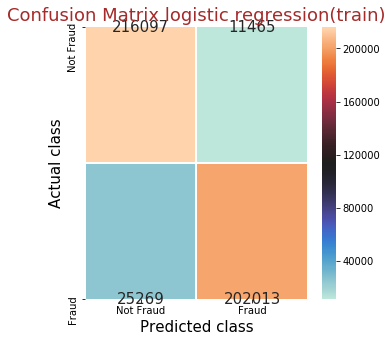

In [58]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_lr,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix logistic regression(train)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <ins><font color='Teal'>Random Forest Classifier Model</font></ins>

It is an ensemble learning model in machine learning which is useful
in classification and regression problems which works based on decision trees. It uses
multitude decision tress. It is better than usual decision trees where the issue of
overfitting is handled. Usually the performance of random forest is better than decision
trees. It is an ensemble model made of many decision trees using bootstrapping. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [59]:
RDF_C = RandomForestClassifier()

In [60]:
RDF_C.fit(X_train1, y_train1)

RandomForestClassifier()

In [61]:
conf_mat_rf = metrics.confusion_matrix(y_train1,RDF_C.predict(X_train1))
classification_rf = metrics.classification_report(y_train1, RDF_C.predict(X_train1))

In [62]:
print(conf_mat_rf)
print()
print(classification_rf)

[[227562      0]
 [     0 227282]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227562
           1       1.00      1.00      1.00    227282

    accuracy                           1.00    454844
   macro avg       1.00      1.00      1.00    454844
weighted avg       1.00      1.00      1.00    454844



<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix random forest classifier(train)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

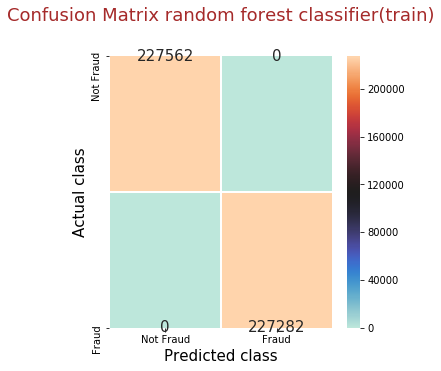

In [63]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_rf,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix random forest classifier(train)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <ins><font color='Teal'>Bernoulli Naive Baye Model</font></ins>

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem (of conditional probability). It is not a single algorithm but a family of algorithms where all of 
them share a common principle, i.e. every pair of features being classified is independent of each other. The fundamental Naive Bayes assumption is that each feature makes an
independent, equal contribution to the outcome. 

In [64]:
BNB_C = BernoulliNB()

In [65]:
BNB_C.fit(X_train1, y_train1)

BernoulliNB()

In [66]:
conf_mat_nb = metrics.confusion_matrix(y_train1,BNB_C.predict(X_train1))
classification_nb = metrics.classification_report(y_train1, BNB_C.predict(X_train1))

In [67]:
print(conf_mat_nb)
print()
print(classification_nb)

[[222152   5410]
 [ 67726 159556]]

              precision    recall  f1-score   support

           0       0.77      0.98      0.86    227562
           1       0.97      0.70      0.81    227282

    accuracy                           0.84    454844
   macro avg       0.87      0.84      0.84    454844
weighted avg       0.87      0.84      0.84    454844



<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix Naive bayes(train)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

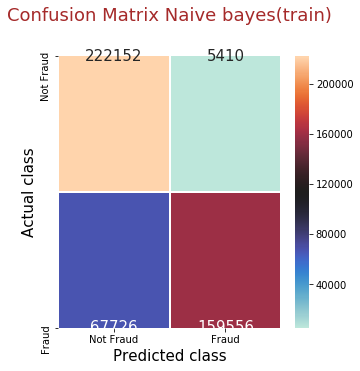

In [68]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_nb,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix Naive bayes(train)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <ins><font color='Teal'>K Nearest Neighbours Classifier</font></ins>

It is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. It stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [69]:
from sklearn.neighbors import KNeighborsClassifier
KNN_C = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [70]:
KNN_C.fit(X_train1, y_train1)

KNeighborsClassifier(metric='euclidean')

In [71]:
conf_mat_knn = metrics.confusion_matrix(y_train1,KNN_C.predict(X_train1))
classification_knn = metrics.classification_report(y_train1, KNN_C.predict(X_train1))

In [72]:
%%time
print(conf_mat_knn)
print()
print(classification_knn)

[[227274    288]
 [     0 227282]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227562
           1       1.00      1.00      1.00    227282

    accuracy                           1.00    454844
   macro avg       1.00      1.00      1.00    454844
weighted avg       1.00      1.00      1.00    454844

Wall time: 7.54 ms


<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix knn classifier(train)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

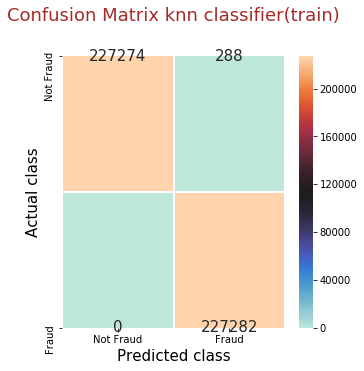

In [73]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_knn,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix knn classifier(train)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <mark><font color='Indigo'>Obtaining Metrics</font></mark>

In [74]:
def get_metrics(conf):
    TP = conf[1,1]
    TN = conf[0,0]
    FN = conf[1,0]
    FP = conf[0,1]
    accuracy = round(((TP+TN) / (TP + FN + FP + TN))*100 ,2)
    precision = round((TP / (TP + FP))*100 ,2)
    sensitivity = round((TP / (TP + FN))*100 ,2)
    specificity = round((TN / (TN + FP))*100 ,2)
    f1_score = round((TP/(TP+ 0.5*(FP+FN)))*100,2)
    classification_error_rate = round(((FP + FN) / (TP+FP+TN+FN))*100 ,2)
    return accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate  

In [75]:
#for conf_mat in (conf_mat_lr):

In [76]:
print('Performance metrics of LOGISTIC REGRESSION model')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_lr)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Performance metrics of LOGISTIC REGRESSION model
Accuracy            :  91.92
Precision           :  94.63
Sensitivity         :  88.88
Specificity         :  94.96
f1 score            :  91.67
classification error:  8.08


In [77]:
print('Performance metrics of RANDOM FOREST model')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_rf)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Performance metrics of RANDOM FOREST model
Accuracy            :  100.0
Precision           :  100.0
Sensitivity         :  100.0
Specificity         :  100.0
f1 score            :  100.0
classification error:  0.0


In [78]:
print('Performance metrics of NAIVE BAYES model')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_nb)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Performance metrics of NAIVE BAYES model
Accuracy            :  83.92
Precision           :  96.72
Sensitivity         :  70.2
Specificity         :  97.62
f1 score            :  81.35
classification error:  16.08


In [79]:
print('Performance metrics of KNN CLASSIFICATION model')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_knn)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Performance metrics of KNN CLASSIFICATION model
Accuracy            :  99.94
Precision           :  99.87
Sensitivity         :  100.0
Specificity         :  99.87
f1 score            :  99.94
classification error:  0.06


## <font color='crimson'>Testing the models:</font>

###  <ins><font color='Teal'>Logistic Regression</font></ins>

In [80]:
conf_mat_lr_test = metrics.confusion_matrix(y_test1,LGR_C.predict(X_test1))
classification_lr_test = metrics.classification_report(y_test1, LGR_C.predict(X_test1))

In [81]:
print(conf_mat_lr_test)
print()
print(classification_lr_test)

[[53762  2991]
 [ 6323 50635]]

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     56753
           1       0.94      0.89      0.92     56958

    accuracy                           0.92    113711
   macro avg       0.92      0.92      0.92    113711
weighted avg       0.92      0.92      0.92    113711



<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix logistic regression(test)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

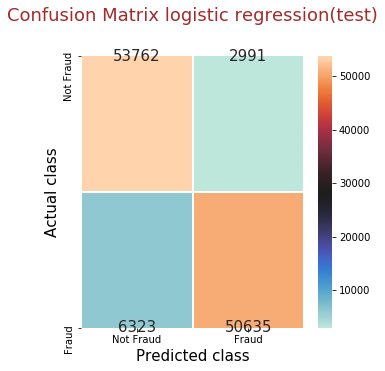

In [82]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_lr_test,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix logistic regression(test)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <ins><font color='Teal'>Random Forest Classifier Model</font></ins> 

In [83]:
conf_mat_rf_test = metrics.confusion_matrix(y_test1,RDF_C.predict(X_test1))
classification_rf_test = metrics.classification_report(y_test1, RDF_C.predict(X_test1))

In [84]:
print(conf_mat_rf_test)
print()
print(classification_rf_test)

[[56742    11]
 [    0 56958]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56753
           1       1.00      1.00      1.00     56958

    accuracy                           1.00    113711
   macro avg       1.00      1.00      1.00    113711
weighted avg       1.00      1.00      1.00    113711



<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix random forest (test)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

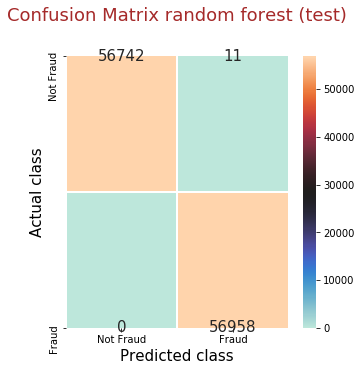

In [85]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_rf_test,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix random forest (test)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

#Reference:https://towardsdatascience.com/the-two-variations-of-confusion-matrix-get-confused-never-again-8d4fb00df308

###  <ins><font color='Teal'>Naive Bayes Classifier Model</font></ins> 

In [86]:
conf_mat_nb_test = metrics.confusion_matrix(y_test1,BNB_C.predict(X_test1))
classification_nb_test = metrics.classification_report(y_test1, BNB_C.predict(X_test1))

In [87]:
print(conf_mat_nb_test)
print()
print(classification_nb_test)

[[55395  1358]
 [16985 39973]]

              precision    recall  f1-score   support

           0       0.77      0.98      0.86     56753
           1       0.97      0.70      0.81     56958

    accuracy                           0.84    113711
   macro avg       0.87      0.84      0.84    113711
weighted avg       0.87      0.84      0.84    113711



<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix Naive Bayes(test)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

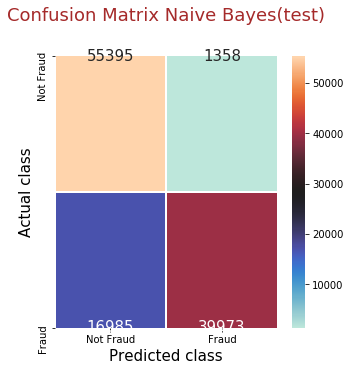

In [88]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_nb_test,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix Naive Bayes(test)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <ins><font color='Teal'>KNN Classifier Model</font></ins> 

In [89]:
conf_mat_knn_test = metrics.confusion_matrix(y_test1,KNN_C.predict(X_test1))
classification_knn_test = metrics.classification_report(y_test1, KNN_C.predict(X_test1))

In [90]:
print(conf_mat_knn_test)
print()
print(classification_knn_test)

[[56613   140]
 [    1 56957]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56753
           1       1.00      1.00      1.00     56958

    accuracy                           1.00    113711
   macro avg       1.00      1.00      1.00    113711
weighted avg       1.00      1.00      1.00    113711



<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix knn classifier(test)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

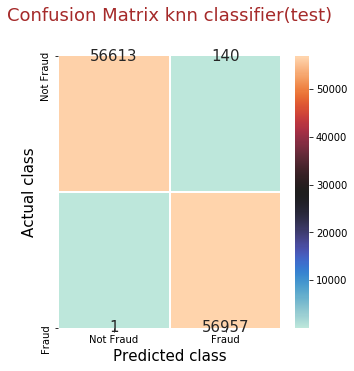

In [91]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_knn_test,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix knn classifier(test)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <mark><font color='Indigo'>Obtaining metrics of test data</font></mark>

In [92]:
print('Performance metrics of LOGISTIC REGRESSION model')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_lr_test)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Performance metrics of LOGISTIC REGRESSION model
Accuracy            :  91.81
Precision           :  94.42
Sensitivity         :  88.9
Specificity         :  94.73
f1 score            :  91.58
classification error:  8.19


In [93]:
print('Performance metrics of RANDOM FOREST model')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_rf_test)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Performance metrics of RANDOM FOREST model
Accuracy            :  99.99
Precision           :  99.98
Sensitivity         :  100.0
Specificity         :  99.98
f1 score            :  99.99
classification error:  0.01


In [250]:
print('Performance metrics of NAIVE BAYES FOREST model')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_nb_test)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Performance metrics of NAIVE BAYES FOREST model
Accuracy            :  83.87
Precision           :  96.71
Sensitivity         :  70.18
Specificity         :  97.61
f1 score            :  81.34
classification error:  16.13


In [251]:
print('Performance metrics of KNN CLASSIFIER model')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_knn_test)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Performance metrics of KNN CLASSIFIER model
Accuracy            :  99.88
Precision           :  99.75
Sensitivity         :  100.0
Specificity         :  99.75
f1 score            :  99.88
classification error:  0.12


##  <font color='crimson'>Performing Cross Validation</font>

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.
Here, stratified k-fold cross-validation is used, which is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [96]:
from sklearn.model_selection import cross_val_predict,StratifiedKFold
from sklearn.metrics import confusion_matrix

In [97]:
sk1 = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)
sk2 = StratifiedKFold(n_splits=10,  shuffle=True, random_state=42)

In [98]:
stc=StandardScaler().fit(X)
X_sc=stc.transform(X)

In [99]:
#y_pred_lgr_1 = cross_val_predict(LGR_C, X1, y1, cv=sk1)

###  <ins><font color='Teal'>Logistic Regression Model</font></ins> 

In [100]:
y_pred_lgr_5 = cross_val_predict(LGR_C, X_sc, y, cv=sk1)

In [101]:
y_pred_lgr_10 = cross_val_predict(LGR_C, X_sc, y, cv=sk2)

In [102]:
conf_mat_lgr_5 = confusion_matrix(y, y_pred_lgr_5)
conf_mat_lgr_5

array([[277657,   6658],
       [    44,    448]], dtype=int64)

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix logistic regression(cv=5)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

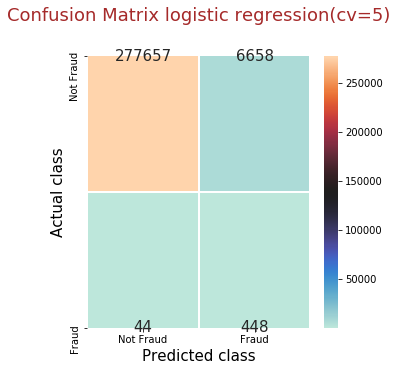

In [103]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_lgr_5,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix logistic regression(cv=5)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

In [104]:
conf_mat_lgr_10 = confusion_matrix(y, y_pred_lgr_10)
conf_mat_lgr_10

array([[277746,   6569],
       [    43,    449]], dtype=int64)

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix logistic regression(cv=10)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

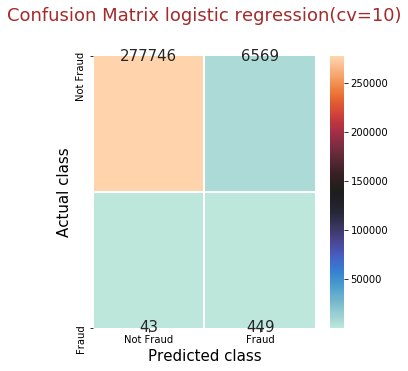

In [105]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_lgr_10,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix logistic regression(cv=10)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <ins><font color='Teal'>Random Forest Classifier Model</font></ins>

In [106]:
y_pred_rdf_5 = cross_val_predict(RDF_C, X_sc, y, cv=sk1)

In [107]:
y_pred_rdf_10 = cross_val_predict(RDF_C, X_sc, y, cv=sk2)

In [108]:
conf_mat_rdf_5 = confusion_matrix(y, y_pred_rdf_5)
conf_mat_rdf_5

array([[284296,     19],
       [   105,    387]], dtype=int64)

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix random forest (cv=5)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

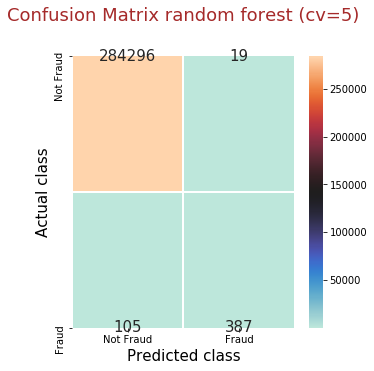

In [109]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_rdf_5,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix random forest (cv=5)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

In [110]:
conf_mat_rdf_10 = confusion_matrix(y, y_pred_rdf_10)
conf_mat_rdf_10

array([[284296,     19],
       [   109,    383]], dtype=int64)

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix random forest (cv=10)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

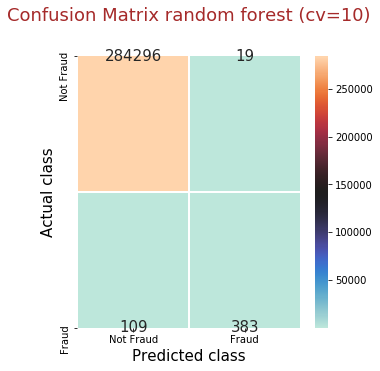

In [111]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_rdf_10,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix random forest (cv=10)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <ins><font color='Teal'>Bernoulli Naive Bayes Model</font></ins>

In [112]:
y_pred_bnb_5 = cross_val_predict(BNB_C, X_sc, y, cv=sk1)

In [113]:
y_pred_bnb_10 = cross_val_predict(BNB_C, X_sc, y, cv=sk2)

In [114]:
conf_mat_bnb_5 = confusion_matrix(y, y_pred_bnb_5)
conf_mat_bnb_5

array([[284248,     67],
       [   175,    317]], dtype=int64)

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix Naive bayes (cv=5)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

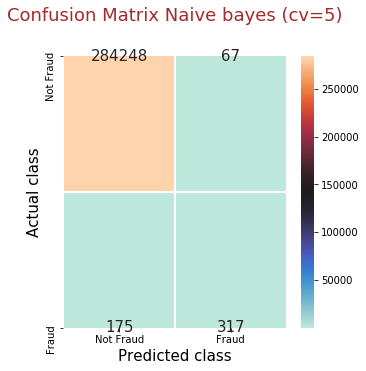

In [115]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_bnb_5,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix Naive bayes (cv=5)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

In [116]:
conf_mat_bnb_10 = confusion_matrix(y, y_pred_bnb_10)
conf_mat_bnb_10

array([[284248,     67],
       [   176,    316]], dtype=int64)

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix Naive Bayes (cv=10)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

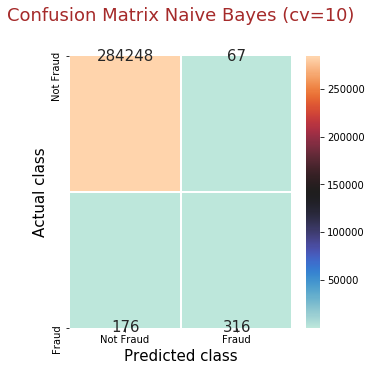

In [117]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_bnb_10,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix Naive Bayes (cv=10)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <ins><font color='Teal'>KNN Classifier Model</font></ins> 

In [118]:
y_pred_knn_5 = cross_val_predict(KNN_C, X_sc, y, cv=sk1)

In [119]:
y_pred_knn_10 = cross_val_predict(KNN_C, X_sc, y, cv=sk2)

In [120]:
conf_mat_knn_5 = confusion_matrix(y, y_pred_knn_5)
conf_mat_knn_5

array([[284288,     27],
       [   111,    381]], dtype=int64)

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix KNN classifier (cv=5)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

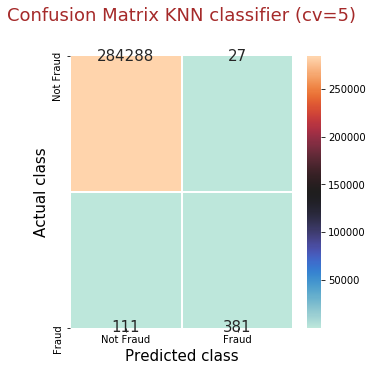

In [121]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_knn_5,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix KNN classifier (cv=5)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

In [122]:
conf_mat_knn_10 = confusion_matrix(y, y_pred_knn_10)
conf_mat_knn_10

array([[284287,     28],
       [   109,    383]], dtype=int64)

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix KNN classifier (cv=10)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

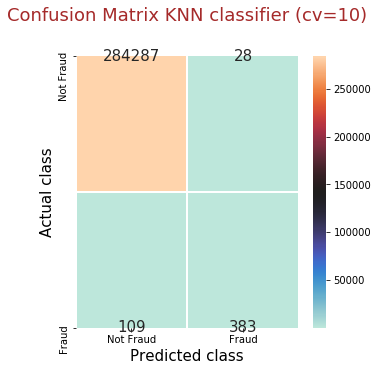

In [123]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_mat_knn_10,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix KNN classifier (cv=10)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <mark><font color='Indigo'>Obtaining metric after cross validation</font></mark>

In [124]:
print('Metrics of Logistic regression model after cross validation (cv=5): \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_lgr_5)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of Logistic regression model after cross validation (cv=5): 

Accuracy            :  97.65
Precision           :  6.3
Sensitivity         :  91.06
Specificity         :  97.66
f1 score            :  11.79
classification error:  2.35


In [125]:
print('Metrics of Logistic regression model after cross validation (cv=10): \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_lgr_10)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of Logistic regression model after cross validation (cv=10): 

Accuracy            :  97.68
Precision           :  6.4
Sensitivity         :  91.26
Specificity         :  97.69
f1 score            :  11.96
classification error:  2.32


In [126]:
print('Metrics of Random Forest model after cross validation (cv=5): \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_rdf_5)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of Random Forest model after cross validation (cv=5): 

Accuracy            :  99.96
Precision           :  95.32
Sensitivity         :  78.66
Specificity         :  99.99
f1 score            :  86.19
classification error:  0.04


In [127]:
print('Metrics of Random Forest model after cross validation (cv=10): \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_rdf_10)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of Random Forest model after cross validation (cv=10): 

Accuracy            :  99.96
Precision           :  95.27
Sensitivity         :  77.85
Specificity         :  99.99
f1 score            :  85.68
classification error:  0.04


In [128]:
print('Metrics of Naive Bayes model after cross validation (cv=5): \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_bnb_5)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of Naive Bayes model after cross validation (cv=5): 

Accuracy            :  99.92
Precision           :  82.55
Sensitivity         :  64.43
Specificity         :  99.98
f1 score            :  72.37
classification error:  0.08


In [129]:
print('Metrics of Naive Bayes model after cross validation (cv=10): \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_bnb_10)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of Naive Bayes model after cross validation (cv=10): 

Accuracy            :  99.91
Precision           :  82.51
Sensitivity         :  64.23
Specificity         :  99.98
f1 score            :  72.23
classification error:  0.09


In [130]:
print('Metrics of KNN classification model after cross validation (cv=5): \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_knn_5)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of KNN classification model after cross validation (cv=5): 

Accuracy            :  99.95
Precision           :  93.38
Sensitivity         :  77.44
Specificity         :  99.99
f1 score            :  84.67
classification error:  0.05


In [131]:
print('Metrics of KNN classification model after cross validation (cv=10): \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_mat_knn_10)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of KNN classification model after cross validation (cv=10): 

Accuracy            :  99.95
Precision           :  93.19
Sensitivity         :  77.85
Specificity         :  99.99
f1 score            :  84.83
classification error:  0.05


#### Confusion Matrix:
We aim to reduce FP,FN error where actual frauds are predicted as normal.

###  <ins><font color='Teal'>Auto Encoder</font></ins>

Auto
encoders are usually trained with normal data and are fed with anomalous or abnormal
data during validation phase which will give higher reconstruction error when
compared with normal data, this concept is used to detect anomalous data points. This
is the logic used for our project to detect fraudulent credit card transactions where
normal data is given to the model for training and fradulent transactions are given
during testing and based on reconstruction error summary, appropriate threshold can be set based on our requirement. 

#### Preparing data for modelling

In [132]:
X_train2,X_test2=train_test_split(credit_data_new,test_size=0.2,random_state=42)
X_train2=X_train2[X_train2.Class==0] #considering only non fraud class of X_train taken from actual credit data as x_train
y_train2=X_train2['Class'] #assiging class col of x_train of x_train
X_train2=X_train2.drop(['Class'],axis=1) #dropping target col class from x_train
y_test2=X_test2['Class'] #assigning class col of x_test to y_test
X_test2=X_test2.drop(['Class'],axis=1) #dropping target col from x_test after assiging it to y_test


Shape of the test and train data:

In [133]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(227451, 29)
(56962, 29)
(227451,)
(56962,)


In [135]:
sc2=StandardScaler().fit(X_train2)
X_train2=sc2.transform(X_train2)
X_test2=sc2.transform(X_test2)

####  Reference:https://towardsdatascience.com/extreme-rare-event-classification-using-autoencoders-in-keras-a565b386f098
https://blog.keras.io/building-autoencoders-in-keras.html

In [136]:
input_dimension=X_train2.shape[1]
encoding_dimension=14

In [137]:
input_layer=Input(shape=(input_dimension,))
encoder=Dense(encoding_dimension,activation="tanh",activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dimension / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dimension / 2), activation='tanh')(encoder)
decoder = Dense(input_dimension, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

##### Configuring the training model

In [138]:
nb_epoch = 100
batch_size = 32 #multiples of 2 and value to support RAM capacity 

#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)  #to save model periodically
tensorboard = TensorBoard(log_dir='./logs',   
                     histogram_freq=0,
                          write_graph=True,
                          write_images=True
                         )  #periodically write model logs which can later be visualized

In [139]:
#%load_ext tensorboard

In [140]:
#%tensorboard --logdir C:\Users\krish\Downloads\logs\validation

###### Training the model:

In [141]:
history = autoencoder.fit(X_train2, X_train2,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test2, X_test2),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
7108/7108 [==============================] - 16s 2ms/step - loss: 0.8193 - accuracy: 0.3658 - val_loss: 0.7900 - val_accuracy: 0.4737
Epoch 2/100
7108/7108 [==============================] - 15s 2ms/step - loss: 0.7409 - accuracy: 0.5068 - val_loss: 0.7671 - val_accuracy: 0.5212
Epoch 3/100
7108/7108 [==============================] - 13s 2ms/step - loss: 0.7272 - accuracy: 0.5252 - val_loss: 0.7566 - val_accuracy: 0.5340
Epoch 4/100
7108/7108 [==============================] - 11s 2ms/step - loss: 0.7208 - accuracy: 0.5292 - val_loss: 0.7540 - val_accuracy: 0.5322
Epoch 5/100
7108/7108 [==============================] - 11s 2ms/step - loss: 0.7168 - accuracy: 0.5313 - val_loss: 0.7505 - val_accuracy: 0.5213
Epoch 6/100
7108/7108 [==============================] - 12s 2ms/step - loss: 0.7137 - accuracy: 0.5311 - val_loss: 0.7482 - val_accuracy: 0.5273
Epoch 7/100
7108/7108 [==============================] - 13s 2ms/step - loss: 0.7117 - accuracy: 0.5314 - val_loss: 0.7478 -

In [142]:
autoencoder = load_model('model.h5')

#### Model Evaluation:
#val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data. 

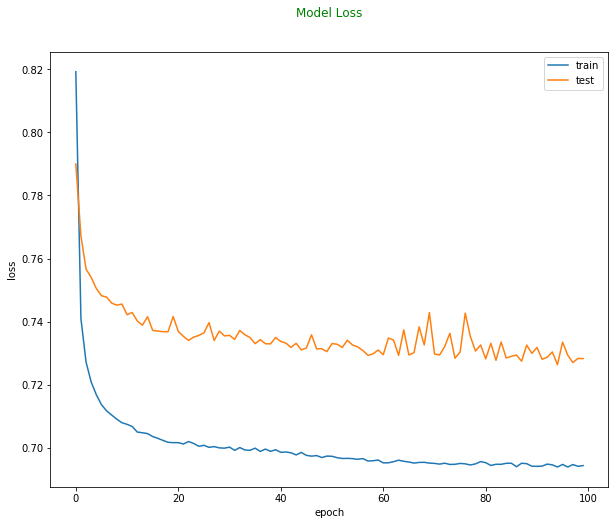

In [143]:
plt.figure(figsize=(10,8))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss',color='g')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [144]:
predictions = autoencoder.predict(X_test)

In [145]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_credit_data = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [146]:
error_credit_data.describe()


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.702642,0.001720
std,2.689833,0.041443
min,0.047883,0.000000
25%,0.265245,0.000000
50%,0.413033,0.000000
75%,0.641407,0.000000
max,167.441719,1.000000


In [147]:
error_credit_data.head(15)

,reconstruction_error,true_class
263020,0.348747,0
11378,1.323744,0
147283,1.568699,0
219439,0.183462,0
36939,0.996947,0
243438,0.270629,0
259448,0.726210,0
43800,0.297021,0
66742,0.185650,0
66499,0.274174,0


#### Reconstruction error without fraud:

(array([5.1732e+04, 3.4940e+03, 6.4000e+02, 3.0900e+02, 1.7800e+02,
        1.1300e+02, 9.0000e+01, 5.5000e+01, 3.7000e+01, 3.3000e+01]),
 array([0.04788251, 1.04082096, 2.03375941, 3.02669786, 4.01963631,
        5.01257476, 6.00551322, 6.99845167, 7.99139012, 8.98432857,
        9.97726702]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Reconstruction error of normal data')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Normal transactions')

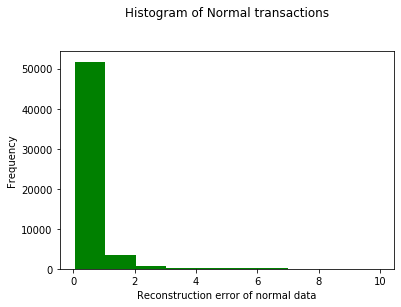

In [148]:
normal_error_credit_data = error_credit_data[(error_credit_data['true_class']== 0) & (error_credit_data['reconstruction_error'] < 10)]


plt.hist(normal_error_credit_data.reconstruction_error.values,bins=10,color='g')
plt.xlabel('Reconstruction error of normal data')
plt.ylabel('Frequency')
plt.title("Histogram of Normal transactions")
plt.show()

#or
#fig = plt.figure()
#ax = fig.add_subplot(111)
#_ = ax.hist(normal_error_credit_data.reconstruction_error.values, bins=10,color='g')

#### Reconstruction error with fraud:

(array([48., 19.,  7.,  0.,  6.,  7.,  7.,  0.,  1.,  3.]),
 array([  0.25415989,  11.05814722,  21.86213455,  32.66612188,
         43.4701092 ,  54.27409653,  65.07808386,  75.88207119,
         86.68605852,  97.49004585, 108.29403317]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Reconstruction error of fraudulent transaction data')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Fradulent transactions')

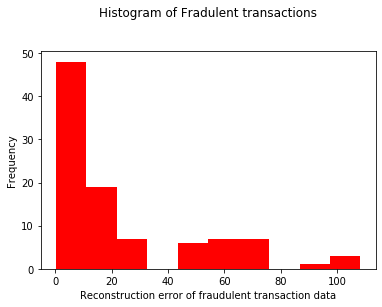

In [149]:
fraud_error_credit_data = error_credit_data[error_credit_data['true_class'] == 1]
plt.hist(fraud_error_credit_data.reconstruction_error.values,bins=10,color='r')
plt.xlabel('Reconstruction error of fraudulent transaction data')
plt.ylabel('Frequency')
plt.title("Histogram of Fradulent transactions")
plt.show()
#or
#fig = plt.figure()
#ax = fig.add_subplot(111)
#_ = ax.hist(fraud_error_credit_data.reconstruction_error.values, bins=10,color='r')

   #### ROC Curve:

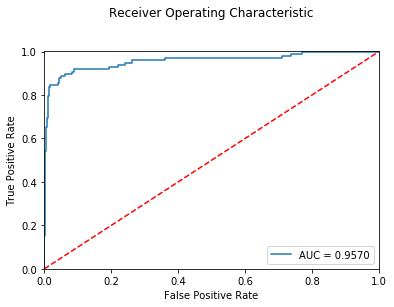

In [150]:
fpr, tpr, thresholds = roc_curve(error_credit_data.true_class, error_credit_data.reconstruction_error)
#print(fpr)
#print(tpr)
#print(thresholds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Text(0.5, 1.0, 'Recall vs Precision')

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

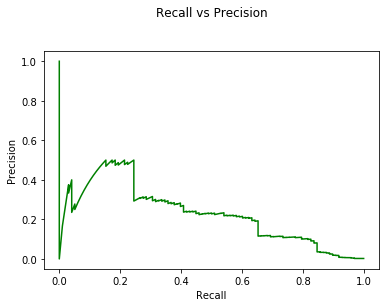

In [151]:
precision, recall, th = precision_recall_curve(error_credit_data.true_class, error_credit_data.reconstruction_error)
plt.plot(recall, precision, 'g', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Text(0.5, 1.0, 'Precision for different threshold values')

Text(0.5, 0, 'Threshold')

Text(0, 0.5, 'Precision')

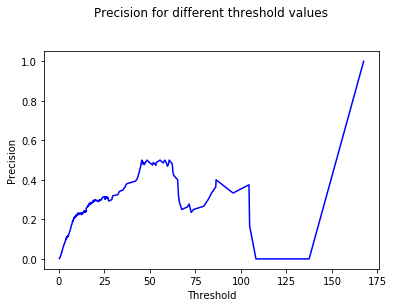

In [152]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()


Text(0.5, 1.0, 'Recall for different threshold values')

Text(0.5, 0, 'Reconstruction error')

Text(0, 0.5, 'Recall')

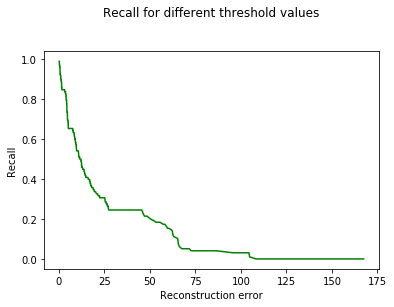

In [153]:
plt.plot(th, recall[1:], 'g', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [154]:
error_credit_data.head()
print('fraud class \n')
error_credit_data[error_credit_data['true_class']==1].describe()
print('normal class \n')
error_credit_data[error_credit_data['true_class']==0].describe()

,reconstruction_error,true_class
263020,0.348747,0
11378,1.323744,0
147283,1.568699,0
219439,0.183462,0
36939,0.996947,0


fraud class 



,reconstruction_error,true_class
count,98.000000,98.0
mean,23.563674,1.0
std,27.138305,0.0
min,0.254160,1.0
25%,4.428526,1.0
50%,11.829841,1.0
75%,27.386753,1.0
max,108.294033,1.0


normal class 



,reconstruction_error,true_class
count,56864.000000,56864.0
mean,0.663243,0.0
std,2.255895,0.0
min,0.047883,0.0
25%,0.265070,0.0
50%,0.412431,0.0
75%,0.639677,0.0
max,167.441719,0.0


#### Reconstructing on fraud data

In [155]:
threshold = 2.9

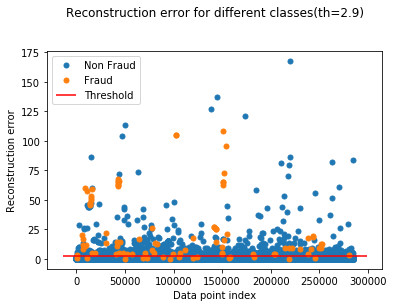

In [156]:
groups = error_credit_data.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=5, linestyle='',
            label= "Fraud" if name == 1 else "Non Fraud")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes(th=2.9)")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [157]:
error_credit_data['true_class'].head()

263020    0
11378     0
147283    0
219439    0
36939     0
Name: true_class, dtype: int64

In [158]:
y_pred = [1 if e > threshold else 0 for e in error_credit_data.reconstruction_error.values]
type(y_pred)

list

In [159]:
conf_matrix_29=metrics.confusion_matrix(error_credit_data.true_class, y_pred)

numpy.ndarray

[[55823  1041]
 [   15    83]]


<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix with autoencoders(th=2.9)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

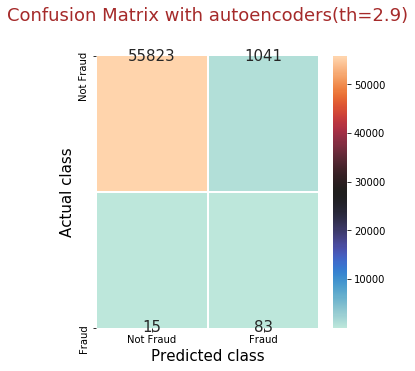

In [160]:
type(conf_matrix_29)
print(conf_matrix_29)
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_matrix_29,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix with autoencoders(th=2.9)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

In [161]:
print('Metrics of AUTO ENCODER with threshold 2.9 : \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_matrix_29)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of AUTO ENCODER with threshold 2.9 : 

Accuracy            :  98.15
Precision           :  7.38
Sensitivity         :  84.69
Specificity         :  98.17
f1 score            :  13.58
classification error:  1.85


In [162]:
threshold = 2.6

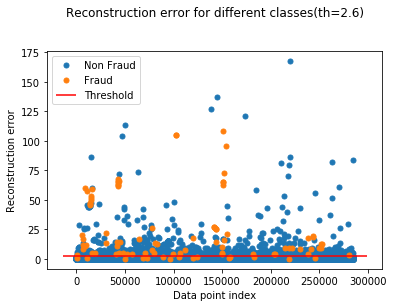

In [163]:
groups = error_credit_data.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=5, linestyle='',
            label= "Fraud" if name == 1 else "Non Fraud")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes(th=2.6)")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [164]:
y_pred = [1 if e > threshold else 0 for e in error_credit_data.reconstruction_error.values]
type(y_pred)

list

In [165]:
conf_matrix_26=metrics.confusion_matrix(error_credit_data.true_class, y_pred)

numpy.ndarray

[[55669  1195]
 [   15    83]]


<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix with autoencoders(th=2.6)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

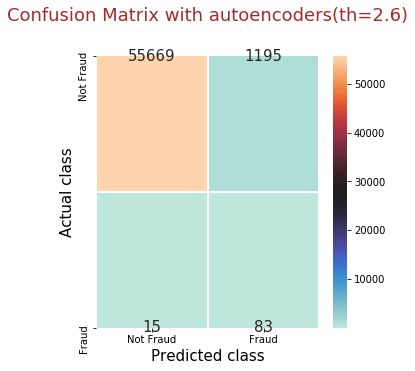

In [166]:
type(conf_matrix_26)
print(conf_matrix_26)
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_matrix_26,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix with autoencoders(th=2.6)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

In [167]:
print('Metrics of AUTO ENCODER with threshold 2.6 : \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_matrix_26)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of AUTO ENCODER with threshold 2.6 : 

Accuracy            :  97.88
Precision           :  6.49
Sensitivity         :  84.69
Specificity         :  97.9
f1 score            :  12.06
classification error:  2.12


In [168]:
threshold = 3.2

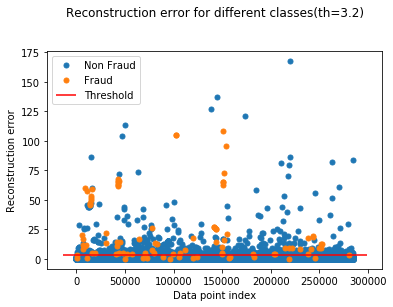

In [169]:
groups = error_credit_data.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=5, linestyle='',
            label= "Fraud" if name == 1 else "Non Fraud")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes(th=3.2)")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [170]:
y_pred = [1 if e > threshold else 0 for e in error_credit_data.reconstruction_error.values]
type(y_pred)

list

numpy.ndarray

[[55924   940]
 [   16    82]]


<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix with autoencoders(th=3.2)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

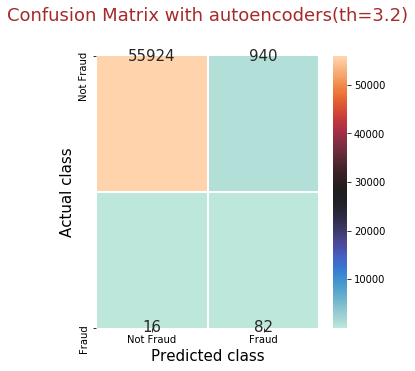

In [171]:
conf_matrix_32=metrics.confusion_matrix(error_credit_data.true_class, y_pred)

type(conf_matrix_32)
print(conf_matrix_32)
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_matrix_32,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix with autoencoders(th=3.2)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

In [172]:
print('Metrics of AUTO ENCODER with threshold 3.2 : \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_matrix_32)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of AUTO ENCODER with threshold 3.2 : 

Accuracy            :  98.32
Precision           :  8.02
Sensitivity         :  83.67
Specificity         :  98.35
f1 score            :  14.64
classification error:  1.68


In [173]:
threshold = 3.6

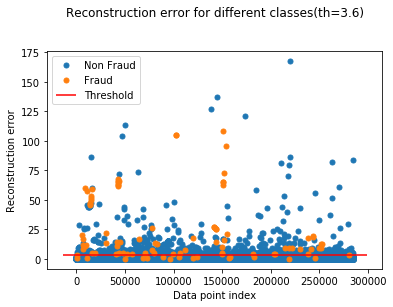

In [174]:
groups = error_credit_data.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=5, linestyle='',
            label= "Fraud" if name == 1 else "Non Fraud")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes(th=3.6)")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [175]:
y_pred = [1 if e > threshold else 0 for e in error_credit_data.reconstruction_error.values]
type(y_pred)

list

In [176]:
conf_matrix_36=metrics.confusion_matrix(error_credit_data.true_class, y_pred)

numpy.ndarray

[[56043   821]
 [   16    82]]


<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix with autoencoders(th=3.6)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

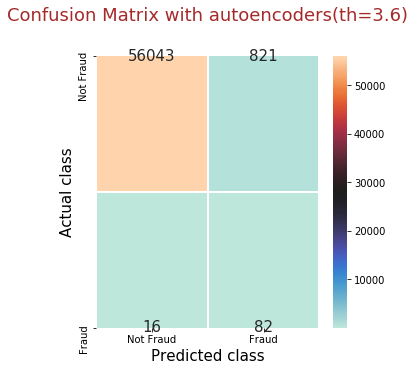

In [177]:
type(conf_matrix_36)
print(conf_matrix_36)
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_matrix_36,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix with autoencoders(th=3.6)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

In [178]:
print('Metrics of AUTO ENCODER with threshold 3.6 : \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_matrix_36)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of AUTO ENCODER with threshold 3.6 : 

Accuracy            :  98.53
Precision           :  9.08
Sensitivity         :  83.67
Specificity         :  98.56
f1 score            :  16.38
classification error:  1.47


In [179]:
threshold=3.8

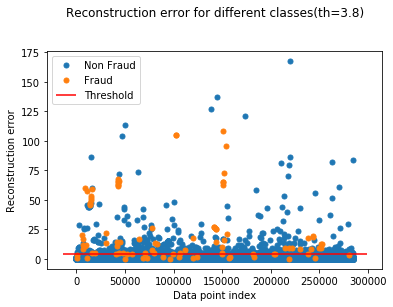

In [180]:
groups = error_credit_data.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=5, linestyle='',
            label= "Fraud" if name == 1 else "Non Fraud")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes(th=3.8)")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [181]:
y_pred = [1 if e > threshold else 0 for e in error_credit_data.reconstruction_error.values]
type(y_pred)

list

In [182]:
conf_matrix_38=metrics.confusion_matrix(error_credit_data.true_class, y_pred)

numpy.ndarray

[[56108   756]
 [   17    81]]


<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix with autoencoders(th=3.8)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

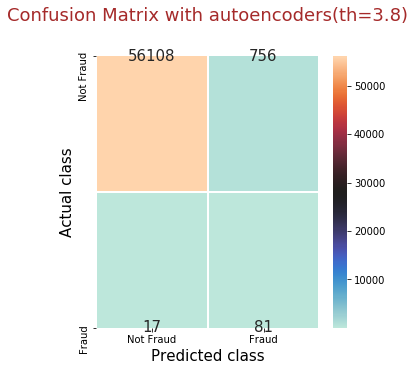

In [183]:
type(conf_matrix_38)
print(conf_matrix_38)
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_matrix_38,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix with autoencoders(th=3.8)",fontsize=18,color='brown')
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

In [184]:
print('Metrics of AUTO ENCODER with threshold 3.8 : \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_matrix_38)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of AUTO ENCODER with threshold 3.8 : 

Accuracy            :  98.64
Precision           :  9.68
Sensitivity         :  82.65
Specificity         :  98.67
f1 score            :  17.33
classification error:  1.36


In [185]:
threshold=6.0

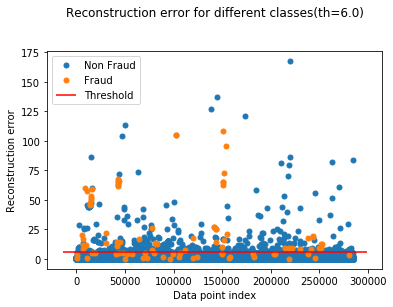

In [186]:
groups = error_credit_data.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=5, linestyle='',
            label= "Fraud" if name == 1 else "Non Fraud")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes(th=6.0)")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [187]:
y_pred = [1 if e > threshold else 0 for e in error_credit_data.reconstruction_error.values]
type(y_pred)

list

In [188]:
conf_matrix_6=metrics.confusion_matrix(error_credit_data.true_class, y_pred)

numpy.ndarray

[[56466   398]
 [   34    64]]


<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix with autoencoders(th=6)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

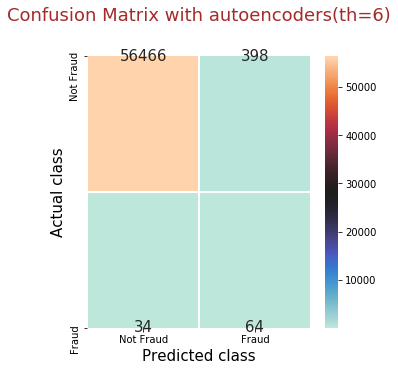

In [189]:
type(conf_matrix_6)
print(conf_matrix_6)
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(conf_matrix_6,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix with autoencoders(th=6)",fontsize=18,color='brown')
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

In [190]:
print('Metrics of AUTO ENCODER with threshold 6 : \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(conf_matrix_6)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of AUTO ENCODER with threshold 6 : 

Accuracy            :  99.24
Precision           :  13.85
Sensitivity         :  65.31
Specificity         :  99.3
f1 score            :  22.86
classification error:  0.76


#### https://books.google.co.in/books?id=6--UDwAAQBAJ&printsec=frontcover&dq=confusion+matrix+in+classification&hl=en&newbks=1&newbks_redir=0&sa=X&ved=2ahUKEwjBzriC99brAhXt6XMBHSiDD2cQ6AEwAXoECAUQAg#v=onepage&q=confusion%20matrix&f=false

###  <ins><font color='Teal'>Mini Batch K-Means</font></ins> 

K-means is one of the most popular clustering algorithms, mainly
because of its good time performance. With the increasing size of the datasets being
analyzed, the computation time of K-means increases because of its constraint of needing
the whole dataset in main memory.
In Mini Batch K-Means,the main idea is to use small random batches of data of a fixed
size, so they can be stored in memory. In each iteration a new random sample from the
dataset is obtained and used to update the clusters and this is repeated until convergence.
Each mini batch updates the clusters using a convex combination of the values of the
prototypes and the data, applying a learning rate that decreases with the number of
iterations. This learning rate is the inverse of the number of data assigned to a cluster
during the process. As the number of iterations increases, the effect of new data is
reduced, so convergence can be detected when no changes in the clusters occur in several
consecutive iterations.

In [191]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X=np.array(credit_data).astype(np.float)
Scaler=MinMaxScaler()
X_scaled=Scaler.fit_transform(X)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Elbow Curve')

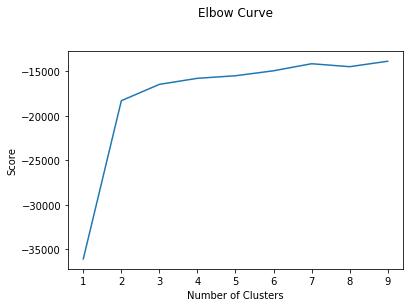

In [192]:
from sklearn.cluster import MiniBatchKMeans




# Define the range of clusters to try
clustno = range(1, 10)
#from sklearn import MiniBatchKMeans
# Run MiniBatch Kmeans over the number of clusters
mbkmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [mbkmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(mbkmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [193]:
# Run the kmeans model on scaled data
mbkmeans = MiniBatchKMeans(n_clusters=2, random_state=42).fit(X_scaled)
# Get the cluster number for each datapoint

In [194]:
from numpy import unique,where
# predict a cluster index to each case
y_pred_mbkm = mbkmeans.predict(X_scaled)
# retrieve unique clusters
clusters = unique(y_pred_mbkm)
clusters
#cluster centroids
X_clusters_centers_mb = mbkmeans.cluster_centers_

array([0, 1])

0.3492008502570088

(array([2.65187e+05, 1.88120e+04, 2.28000e+02, 3.10000e+02, 1.57000e+02,
        7.90000e+01, 3.30000e+01, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.08473122, 0.35709433, 0.62945745, 0.90182056, 1.17418368,
        1.44654679, 1.71890991, 1.99127302, 2.26363614, 2.53599925,
        2.80836237]),
 <a list of 10 Patch objects>)

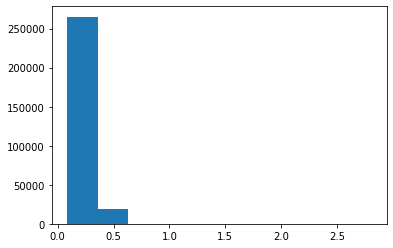

In [195]:
#predict values based on distance
# Calculate the distance to the cluster centroid for each point
dist = [np.linalg.norm(x-y) for x,y in zip(X_scaled, X_clusters_centers_mb[y_pred_mbkm])]
dist[1]
plt.hist(dist,bins=10)

In [196]:
np.min(dist)
np.max(dist)
np.quantile(dist,0.25)
np.quantile(dist,0.5)
np.quantile(dist,0.75)
np.quantile(dist,0.9)
np.quantile(dist,0.93)
np.quantile(dist,0.95)
np.quantile(dist,0.97)
np.quantile(dist,0.99)
np.quantile(dist,0.995)
np.quantile(dist,0.999)
np.quantile(dist,0.9999)

0.08473121708060266

2.808362369507096

0.18750973011932423

0.22503890210651478

0.27476762198384164

0.335392408381039

0.3562746105181197

0.372583460598075

0.3955119333779581

0.44979340245812993

0.5090125264089713

1.1652826651040513

1.7272923037078032

In [197]:
# Create predictions based on distance
mbkm_y_pred = np.array(dist)
mbkm_y_pred[dist>=np.percentile(dist, 99.9)] = 1
mbkm_y_pred[dist<np.percentile(dist, 99.9)] = 0
np.unique(mbkm_y_pred)

array([0., 1.])

In [198]:
mbkmcm =confusion_matrix(y, mbkm_y_pred)
mbkmcm

array([[284283,     32],
       [   239,    253]], dtype=int64)

In [199]:
print('Metrics of MINI K BATCH K-MEANS  : \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(mbkmcm)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of MINI K BATCH K-MEANS  : 

Accuracy            :  99.9
Precision           :  88.77
Sensitivity         :  51.42
Specificity         :  99.99
f1 score            :  65.12
classification error:  0.1


In [200]:
color = np.array(['orange',  'green'])
type(color)
# create scatter plot for samples from each cluster

numpy.ndarray

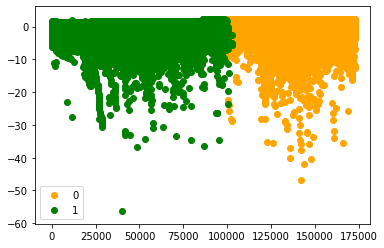

In [201]:

fig, ax = plt.subplots()
for cluster in clusters:
# get row indexes for samples with this cluster
    row_ix = where(y_pred_mbkm == cluster)
# create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1],c=color[cluster],label=cluster)
# show the plot
ax.legend()
plt.show()


In [202]:
# Obtain the ROC score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y, mbkm_y_pred))

0.7570575455284124


<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix Mini Batch K Means')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

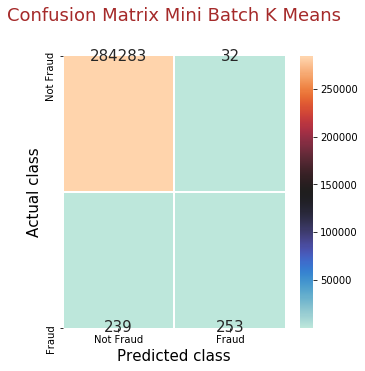

In [203]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(mbkmcm,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix Mini Batch K Means",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <ins><font color='Teal'>K-Means</font></ins>

K-Means is one of the most popular
"clustering" algorithms. K-means stores k centroids that it uses to define clusters. A
point is considered to be in a particular cluster if it is closer to that cluster's centroid
than any other centroid. K-Means finds the best centroids by alternating between (1)
assigning data points to clusters based on the current centroids (2) choosing centroids
(points which are the center of a cluster) based on the current assignment of data points
to clusters

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Elbow Curve')

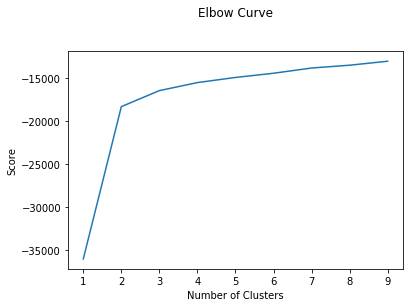

In [204]:
from sklearn.cluster import KMeans
# Define the range of clusters to try
clustno = range(1, 10)
#from sklearn import MiniBatchKMeans
# Run MiniBatch Kmeans over the number of clusters
kmeans = [KMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [205]:
kmeans = KMeans(n_clusters = 2, random_state = 42).fit(X_scaled)
from numpy import unique,where
# predict a cluster index to each case
y_pred_km = kmeans.predict(X_scaled)
# retrieve unique clusters
clusters_km = unique(y_pred_km)
clusters_km
#cluster centroids
X_clusters_centers_km = kmeans.cluster_centers_

array([0, 1])

0.34205417168945346

(array([2.65958e+05, 1.80440e+04, 2.25000e+02, 3.13000e+02, 1.54000e+02,
        7.90000e+01, 3.30000e+01, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.08489252, 0.35726706, 0.62964159, 0.90201612, 1.17439065,
        1.44676518, 1.71913971, 1.99151425, 2.26388878, 2.53626331,
        2.80863784]),
 <a list of 10 Patch objects>)

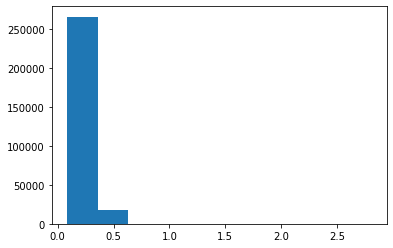

In [206]:
#predict values based on distance
# Calculate the distance to the cluster centroid for each point
distkm = [np.linalg.norm(x-y) for x,y in zip(X_scaled, X_clusters_centers_km[y_pred_km])]
distkm[1]
plt.hist(distkm,bins=10)

In [207]:
np.min(distkm)
np.max(distkm)
np.quantile(distkm,0.25)
np.quantile(distkm,0.5)
np.quantile(distkm,0.75)
np.quantile(distkm,0.9)
np.quantile(distkm,0.93)
np.quantile(distkm,0.95)
np.quantile(distkm,0.97)
np.quantile(distkm,0.99)
np.quantile(distkm,0.995)
np.quantile(distkm,0.999)
np.quantile(distkm,0.9999)

0.08489252398685995

2.8086378400907277

0.18771944699480397

0.2252529297619215

0.2748593996024613

0.3349101972088775

0.35452951721366416

0.37025947909641255

0.39305189575284605

0.44814097882356463

0.5086558065550452

1.1633719252046721

1.7259451058616035

In [208]:
#cd=credit_data_new
#adding cluster column to original df dataset
#cd['cluster'] = y_kmeans

In [209]:
# Create predictions based on distance
km_y_pred = np.array(distkm)
km_y_pred[distkm>=np.percentile(distkm, 99.9)] = 1
km_y_pred[distkm<np.percentile(distkm, 99.9)] = 0
np.unique(km_y_pred)

array([0., 1.])

In [210]:
km_cm =confusion_matrix(y, km_y_pred)
km_cm

array([[284283,     32],
       [   239,    253]], dtype=int64)

In [211]:
print('Metrics of K-MEANS  : \n')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(km_cm)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Metrics of K-MEANS  : 

Accuracy            :  99.9
Precision           :  88.77
Sensitivity         :  51.42
Specificity         :  99.99
f1 score            :  65.12
classification error:  0.1


In [212]:
# Obtain the ROC score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y, km_y_pred))

0.7570575455284124


<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix K Means')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

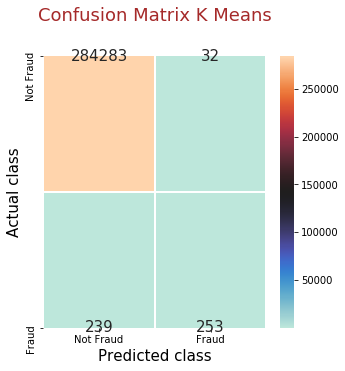

In [213]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(km_cm,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix K Means",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

###  <ins><font color='Teal'>XGBoost Model (replicated from h2o.ai automl results)</font></ins>

It is an algorithm which has been dominating
the field of applied machine learning due to its flexibility, speed, robustness and
advanced performance. It is used for the implementation of gradient boosting decision
trees. XGBoost is able to do parallel computation on a single machine which makes it
faster than other gradient boosting algorithms. It is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

The dataset under study is fed to AUTO ML-H2O.ai driverless ai application where the
model is initiated with different parameters along with specifying the metrics of importance based on the final model generated, the results are replicated in python usig similar parameters.

#### <font color='Violet'>On actual data</font>

In [214]:
import xgboost as xgb
from xgboost import XGBClassifier

In [215]:
classifier1 = XGBClassifier(learning_rate=0.03,n_estimators=2400,num_classes=2,n_jobs=2,objective='binary:logistic',model_class_name='XGBoostGBMModel',random_state=42,ensemble_level=3,seed=42,nfolds=5,time_tolerance=2,score_f_name='f1',eval_metric='auc',booster='gbtree')

In [216]:
classifier1.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],early_stopping_rounds=200,verbose=50)

[17:50:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { ensemble_level, model_class_name, nfolds, num_classes, score_f_name, time_tolerance } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.91486	validation_1-auc:0.93352
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[50]	validation_0-auc:0.91865	validation_1-auc:0.93863
[100]	validation_0-auc:0.94624	validation_1-auc:0.94212
[150]	validation_0-auc:0.97810	validation_1-auc:0.96253
[200]	validation_0-auc:0.99076	validation_1-auc:0.96765
[250]	validation_0-auc:0.99955	validation_1-auc:0.96564
[300]	validation_0-auc:0.99996	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, ensemble_level=3,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              model_class_name='XGBoostGBMModel', monotone_constraints='()',
              n_estimators=2400, n_jobs=2, nfolds=5, num_classes=2,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, score_f_name='f1', seed=42, subsample=1, ...)

In [217]:
np.unique(y_test)
np.unique(y_train)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

<Figure size 1080x504 with 0 Axes>

Text(0, 0.5, 'AUC')

Text(0.5, 0, '# of iterations')

Text(0.5, 1.0, 'XGBoost AUC')

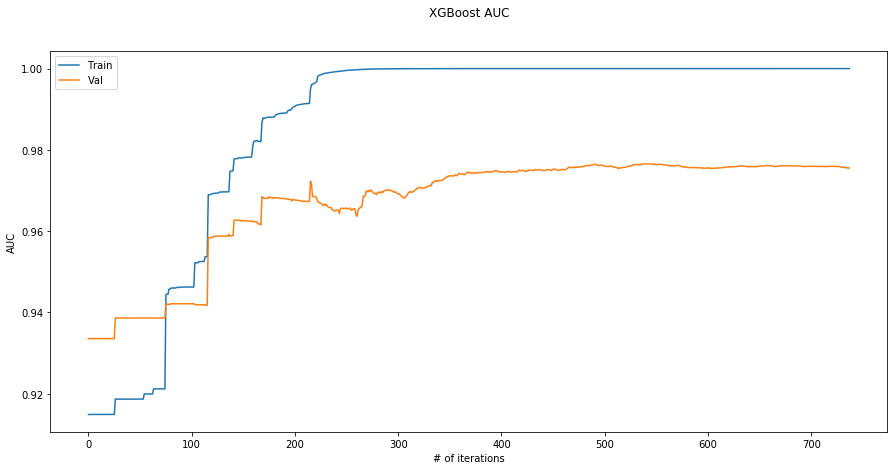

In [218]:
results1 = classifier1.evals_result()
epochs1 = len(results1['validation_0']['auc'])
x_axis1 = range(0, epochs1)
# plotting the loss
plt.figure(figsize=(15, 7))
plt.plot(x_axis1, results1['validation_0']['auc'], label='Train')
plt.plot(x_axis1, results1['validation_1']['auc'], label='Val')
plt.legend()
plt.ylabel('AUC')
plt.xlabel('# of iterations')
plt.title('XGBoost AUC')
plt.show()

In [219]:
from sklearn.metrics import accuracy_score
y_pred_xgb1 = classifier1.predict(X_test)
print(accuracy_score(y_test, y_pred_xgb1))

0.9995435553526912


In [220]:
from sklearn.metrics import accuracy_score
y_pred_xgb1 = classifier1.predict(X_test)
print(accuracy_score(y_test, y_pred_xgb1))

0.9995435553526912


In [221]:
cm_xg1=metrics.confusion_matrix(y_test,y_pred_xgb1)

In [222]:
cf1=classification_report(y_test,y_pred_xgb1)
print("XGBoost Classification Report:" "\n", cf1) 

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [223]:
print('Performance metrics of XGBOOST CLASSIFICATION model')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(cm_xg1)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Performance metrics of XGBOOST CLASSIFICATION model
Accuracy            :  99.95
Precision           :  91.86
Sensitivity         :  80.61
Specificity         :  99.99
f1 score            :  85.87
classification error:  0.05


In [224]:
#type(cf)
#plt.figure(figsize = (5,5))
#sns.set(font_scale=1.4)
#df_cf1=pd.DataFrame(cm_xg1,columns=np.unique(y))

#df_kmcm.index.name = 'Actual'
#df_kmcm.columns.name = 'Predicted'
#sns.heatmap(df_cf1,annot=True,fmt='d',annot_kws={"size": 18},cbar=False,cmap='icefire' )
#plt.title('Confusion matrix of XGBoost oversampled')
#plt.xlabel('Actual label')
#plt.ylabel('Predicted label')

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix XGBoost Classifier')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

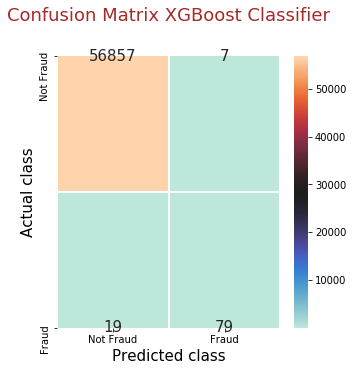

In [225]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(cm_xg1,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix XGBoost Classifier",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

#### <font color='Violet'>On oversampled data</font>

In [226]:
classifier = XGBClassifier(learning_rate=0.03,n_estimators=2400,num_classes=2,n_jobs=2,objective='binary:logistic',model_class_name='XGBoostGBMModel',random_state=1234,ensemble_level=3,seed=1234,nfolds=5,time_tolerance=2,score_f_name='f1',eval_metric='auc',booster='gbtree')

In [227]:
classifier.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)],early_stopping_rounds=200,verbose=50)

[18:07:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { ensemble_level, model_class_name, nfolds, num_classes, score_f_name, time_tolerance } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.98709	validation_1-auc:0.98642
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[50]	validation_0-auc:0.99695	validation_1-auc:0.99661
[100]	validation_0-auc:0.99877	validation_1-auc:0.99855
[150]	validation_0-auc:0.99937	validation_1-auc:0.99919
[200]	validation_0-auc:0.99972	validation_1-auc:0.99959
[250]	validation_0-auc:0.99985	validation_1-auc:0.99974
[300]	validation_0-auc:0.99991	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, ensemble_level=3,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              model_class_name='XGBoostGBMModel', monotone_constraints='()',
              n_estimators=2400, n_jobs=2, nfolds=5, num_classes=2,
              num_parallel_tree=1, random_state=1234, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, score_f_name='f1', seed=1234, subsample=1, ...)

<Figure size 1080x504 with 0 Axes>

Text(0, 0.5, 'AUC')

Text(0.5, 0, '# of iterations')

Text(0.5, 1.0, 'XGBoost AUC')

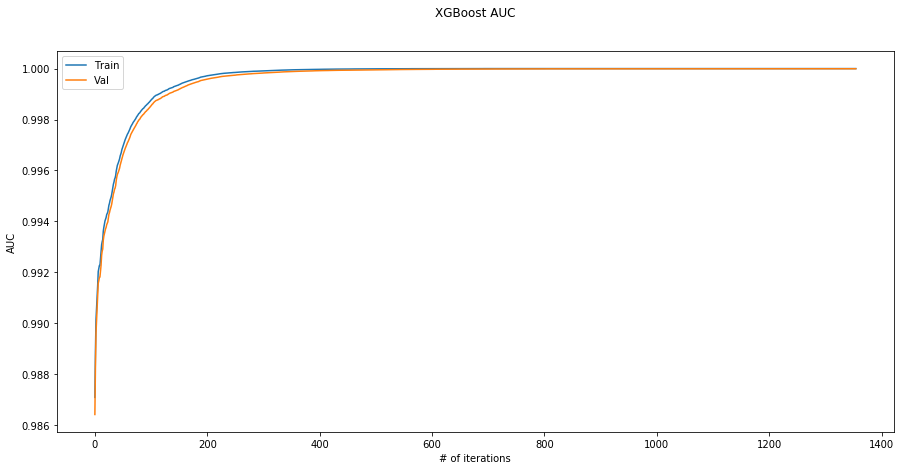

In [228]:
results = classifier.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

# plotting the loss
plt.figure(figsize=(15, 7))
plt.plot(x_axis, results['validation_0']['auc'], label='Train')
plt.plot(x_axis, results['validation_1']['auc'], label='Val')
plt.legend()
plt.ylabel('AUC')
plt.xlabel('# of iterations')
plt.title('XGBoost AUC')
plt.show()

In [229]:
from sklearn.metrics import accuracy_score
y_pred_xgb = classifier.predict(X_test1)
print(accuracy_score(y_test1, y_pred_xgb))

0.9997801444011574


In [230]:
type(X_test1)

numpy.ndarray

In [231]:
cm_xg=metrics.confusion_matrix(y_test1,y_pred_xgb)

In [232]:
cf=classification_report(y_test1,y_pred_xgb)
print("XGBoost Classification Report:" "\n", cf) 

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56753
           1       1.00      1.00      1.00     56958

    accuracy                           1.00    113711
   macro avg       1.00      1.00      1.00    113711
weighted avg       1.00      1.00      1.00    113711



In [233]:
print('Performance metrics of XGBOOST CLASSIFICATION model(oversampled)')
accuracy,precision,sensitivity,specificity,f1_score,classification_error_rate=get_metrics(cm_xg)
print('Accuracy            : ',accuracy)
print('Precision           : ',precision)
print('Sensitivity         : ',sensitivity)
print('Specificity         : ',specificity)
print('f1 score            : ',f1_score)
print('classification error: ',classification_error_rate)

Performance metrics of XGBOOST CLASSIFICATION model(oversampled)
Accuracy            :  99.98
Precision           :  99.96
Sensitivity         :  100.0
Specificity         :  99.96
f1 score            :  99.98
classification error:  0.02


In [234]:
#type(cf)
#plt.figure(figsize = (5,5))
#sns.set(font_scale=1.4)
#df_cf=pd.DataFrame(cm_xg,columns=np.unique(y))

#df_kmcm.index.name = 'Actual'
#df_kmcm.columns.name = 'Predicted'
#sns.heatmap(df_cf,annot=True,fmt='d',annot_kws={"size": 18},cbar=False,cmap='icefire' )
#plt.title('Confusion matrix of XGBoost')
#plt.xlabel('Actual label')
#plt.ylabel('Predicted label')

<Figure size 360x360 with 0 Axes>

Text(0.5, 1, 'Confusion Matrix XGBoost Classifier(oversampled)')

Text(23.999999999999996, 0.5, 'Actual class')

Text(0.5, 24.0, 'Predicted class')

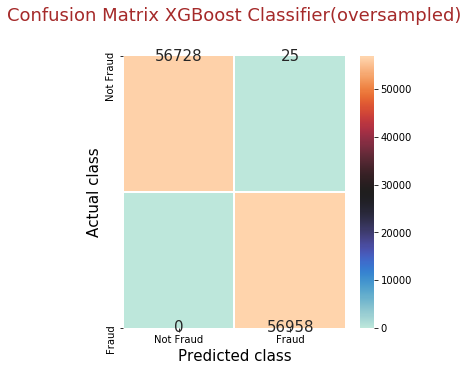

In [235]:
plt.figure(figsize=(5, 5))
annot_kws={"ha":"center","va":"center","size":15}
sns.heatmap(cm_xg,  xticklabels=LABELS, yticklabels=LABELS,annot=True, fmt="d",linewidths=1,annot_kws=annot_kws,cmap='icefire');
plt.title("Confusion Matrix XGBoost Classifier(oversampled)",fontsize=18,color='brown')
rcParams['axes.titlepad'] = 35
plt.ylabel('Actual class',fontsize=15)
plt.xlabel('Predicted class',fontsize=15)
plt.show()

## <font color='crimson'>Creating pickle file for deployment</font>

Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [236]:
import pickle

In [237]:
#pickle.dump(classifier,open('model.pkl','wb'))

In [243]:
model=pickle.load(open('model.pkl','rb'))

In [239]:
#daf=pd.DataFrame([[-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,
#                      0.36378697,0.090794172,-0.551599533,-0.617800856,-0.991389847,-0.311169354,1.468176972,-0.470400525,
#                      0.207971242,0.02579058,0.40399296,0.251412098,-0.018306778,0.277837576,-0.11047391,0.066928075,
#                      0.128539358,-0.189114844,0.133558377,-0.021053053,149.62]]
#)

In [244]:
daf=pd.DataFrame([[1.191857111,0.266150712,0.166480113,0.448154078,0.060017649,-0.082360809,-0.078802983,0.085101655,-0.255425128,-0.166974414,1.612726661,1.065235311,
0.489095016,-0.143772296,0.635558093,0.463917041,-0.114804663,-0.18336127,-0.145783041,-0.069083135,-0.225775248,-0.638671953,
0.101288021,-0.339846476,0.167170404,0.125894532,-0.008983099,0.014724169,2.69]])

type(daf)
###daf.columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']

pandas.core.frame.DataFrame

In [245]:
cols=model.get_booster().feature_names
type(cols)
daf.columns=cols

daf.columns

list

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28'],
      dtype='object')

In [246]:
#cols_when_model_builds = model.get_booster().feature_names
#cols_when_model_builds

##### predicting data

In [247]:
print(model.predict(daf)[0])

0


In [248]:
np.unique(y_test2)

array([0, 1], dtype=int64)

In [249]:
print('train dataset shape {}'.format(Counter(y_test2)))

train dataset shape Counter({0: 56864, 1: 98})


Conclusion:
Since the data we were dealing was credit card fraud detection technique in the banking
domain, our key focus was on identifying fraudulent transactions correctly without any miss
which is very critical because missing any such fraudulent transactions leads to huge loss as
well as penalties to the bank. Besides, we need to reduce the error of tagging normal transaction
as fraud as it may lead to processing and computational overhead along with pushing the
company in to a risk of losing customer loyalty due to inconvenience caused when their cards
or transaction is blocked (In real, it is a non-fraudulent transaction). Hence, I was instrumental
in reducing the False Negatives (FN) and False positives (FP) with False Negatives having
higher priority.
From the results, it is observed that XGBoost is giving optimum performance, XGBoost(oversampled) with FN=0,FP=25 followed by XGBoost with FN=19 and FP=7. Hence the oversampled version is deployed to Heroku.
